# LAB2 - image convolution

**objectives:**

* apply a convolution to an image
* get familiar with 2D Fourier transform
* use non-linear rank filters


## Kernel convolution

1. write a program that apply a 3x3 mean kernel convolution on the cameraman image
1. using the [convolve](http://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html) function, develop the Sobel filter. 
The Sobel operator is given by
$$\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }$$
where both images are respectively obtained by a convolution with the given kernels
$$\mathbf{G}_y = \begin{bmatrix} 
    -1 & -2 & -1  \\
    0 & 0 & 0 \\
    +1 & +2 & +1 
    \end{bmatrix}
    \quad
    \mbox{and}
    \quad   
    \mathbf{G}_x = \begin{bmatrix} 
    -1 & 0 & +1 \\
    -2 & 0 & +2 \\
    -1 & 0 & +1 
    \end{bmatrix}
    $$

## 2D Fourier transform


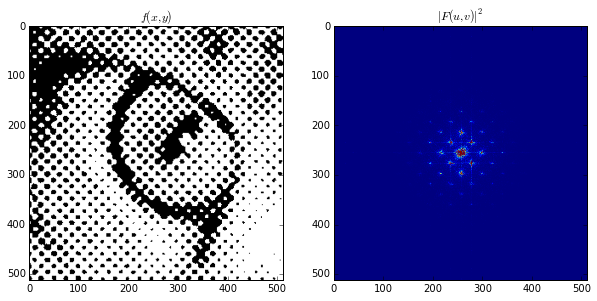

In [22]:
%matplotlib inline
from skimage.io import imread
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import matplotlib.pyplot as plt

im = imread('http://homepages.ulb.ac.be/~odebeir/data/moire1.png').astype(np.float)
f = fft2(im)

power = fftshift(np.abs(f)**2)
pmax = np.max(power)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$');
plt.subplot(1,2,2)
plt.imshow(power,vmin=0,vmax=pmax/5000.);
plt.title('$|F(u,v)|^2$');



starting from the example given above, adress the following questions:

1. use Fourier transform to reduce the dithering of the *moire.png* image 
1. build a high-pass filter using Fourier transform and apply the filter to the lena image (see the following code to extract the first plane of an rgb image)
1. compute an enhenced version of the image using:
$$ I_{enh} = I_{orig} + \alpha \, I_{highpass}$$

(512, 512, 3)


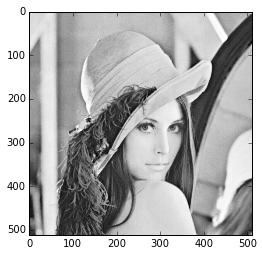

In [23]:
from skimage.data import lena

rgb = lena()
print rgb.shape #this is a 3D image 2 spatial dim. + the spectral dim.

r = rgb[:,:,0]
plt.imshow(r,cmap=plt.cm.gray);

## Rank filters


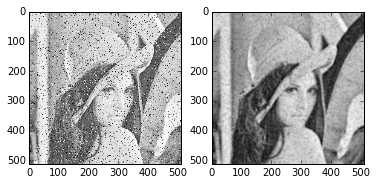

In [24]:
import skimage.filter.rank as skr
from skimage.morphology import disk

# example code to add salt and pepper noise to an image
ima = lena()[:,:,0]
n = np.random.random(ima.shape)

ima[n<.05] = 0 # set 5% of the pixels to 0
ima[n>.95] = 255 # set 5% other pixels to 255

plt.subplot(1,2,1)
plt.imshow(ima,cmap=plt.cm.gray);
plt.subplot(1,2,2)
plt.imshow(skr.mean(ima,disk(4)),cmap=plt.cm.gray);


starting from this example, answer the following questions:
1. compare the mean filter and the median filter effect on the image (same radius)
1. show how the median filter filter noise without smoothing image borders, what is the influence of the radius ?